In [3]:
#natural language processing
s=['Congrats You have won lottery and you can get lottery money by calling number.','Give your bank account details to claim lottery',
   'lottery for sure if bank account details are verified']

In [4]:
type(s)

list

In [5]:
#tokenization - splitting of data into smaller elements

In [6]:
s[0].split()

['Congrats',
 'You',
 'have',
 'won',
 'lottery',
 'and',
 'you',
 'can',
 'get',
 'lottery',
 'money',
 'by',
 'calling',
 'number.']

In [7]:
s[1].split()

['Give', 'your', 'bank', 'account', 'details', 'to', 'claim', 'lottery']

In [8]:
s[2].split()

['lottery',
 'for',
 'sure',
 'if',
 'bank',
 'account',
 'details',
 'are',
 'verified']

In [9]:
#applying count vectorizer/bag of words

In [10]:
from sklearn.feature_extraction.text import CountVectorizer
vect=CountVectorizer(stop_words='english')

In [11]:
op=vect.fit_transform(s).toarray() # applying the count vectorizer
op

array([[0, 0, 1, 0, 1, 0, 2, 1, 1, 0, 0, 1],
       [1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0],
       [1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0]])

In [12]:
# https://www.kaggle.com/karthickveerakumar/spam-filter
import pandas as pd
df=pd.read_csv('/content/emails.csv')
df

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1
...,...,...
5723,Subject: re : research and development charges...,0
5724,"Subject: re : receipts from visit jim , than...",0
5725,Subject: re : enron case study update wow ! a...,0
5726,"Subject: re : interest david , please , call...",0


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5728 entries, 0 to 5727
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5728 non-null   object
 1   spam    5728 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 89.6+ KB


In [14]:
df=df.drop_duplicates(keep='last') #remove all duplicate emails from the data frame
df

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1
...,...,...
5723,Subject: re : research and development charges...,0
5724,"Subject: re : receipts from visit jim , than...",0
5725,Subject: re : enron case study update wow ! a...,0
5726,"Subject: re : interest david , please , call...",0


In [15]:
#bag of word /apply the vectorizer

In [16]:
df['text'][4500]

'Subject: the latest ( last ? )  . . sorry . . . i found something else :  p . 1 , footnote : the newspaper is the " houston chronicle " ( purchased the  \' post \' several years ago ) . . : - )  - - - - - forwarded by christie patrick / hou / ect on 02 / 07 / 2001 05 : 34 pm - - - - -  christie patrick  02 / 07 / 2001 05 : 27 pm  to : mark palmer / corp / enron @ enron  cc : vince j kaminski / hou / ect @ ect , j _ martin @ baylor . edu  subject : the latest ( last ? )  . . as columbo would say . . " . . just one more thing "  p . 20 last bullet : enron focusing on recruiting and retaining talent  thanks again ! christie .  - - - - - forwarded by christie patrick / hou / ect on 02 / 07 / 2001 05 : 24 pm - - - - -  christie patrick  02 / 07 / 2001 05 : 23 pm  to : mark palmer / corp / enron @ enron  cc : vince j kaminski / hou / ect @ ect , j _ martin @ baylor . edu  subject : the latest ( last ? )  mark !  please review the attached article and forward your comments / authorization  f

In [17]:
df["spam"][4500]

np.int64(0)

In [18]:
df['text'][34]

'Subject: ms 2003 software titles available for download  opt - in email special offer unsubscribe me search software top 10 new titles on sale now ! 1 office pro 20032 adobe photoshop 9 . 03 windows xp pro 4 adobe acrobat 7 pro 5 flash mx 20046 corel draw 127 norton antivirus 20058 windows 2003 server 9 alias maya 6 wavefrtl 0 adobe illustrator 11 see more by this manufacturer microsoft symantec adobe customers also bought these other items . . . microsoft office professional edition * 2003 * microsoftchoose : view other titles list price : $ 499 . 00 price : $ 69 . 99 you save : $ 429 . 01 ( 86 % ) availability : available for instant download ! coupon code : 3 ff 9 kuc sales rank : # 1 system requirements | other versions date coupon expires : august 31 st , 2005 average customer review : based on 15177 reviews . write a review . adobe photoshop cs 2 v 9 . 0 adobechoose : view other titles list price : $ 599 . 00 price : $ 69 . 99 you save : $ 529 . 01 ( 90 % ) availability : availa

In [19]:
df['spam'][34]

np.int64(1)

In [20]:
df['spam'].value_counts()

,count
spam,
0,4327
1,1368


<Axes: xlabel='spam'>

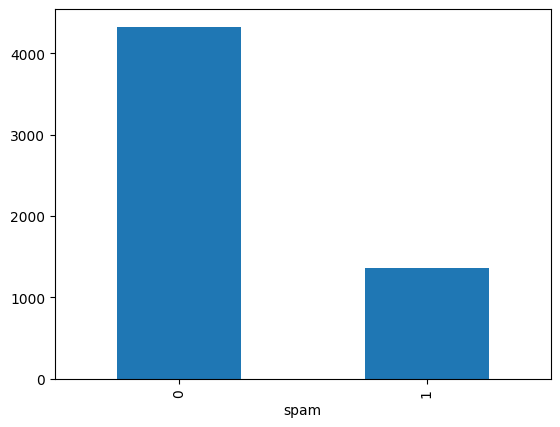

In [21]:
df['spam'].value_counts().plot(kind='bar')

In [22]:
x=df['text'].values
y=df['spam'].values

In [23]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0)

In [24]:
x_train.shape

(4271,)

In [25]:
x_test.shape

(1424,)

In [26]:
from sklearn.feature_extraction.text import CountVectorizer
vect=CountVectorizer(stop_words='english')

In [27]:
vect=CountVectorizer(stop_words='english')
x_train_vect=vect.fit_transform(x_train)
x_test_vect=vect.transform(x_test)

In [28]:
#method 1
from sklearn.svm import SVC
model=SVC()
model.fit(x_train_vect,y_train)

SVC()

In [29]:
y_pred=model.predict(x_test_vect)
y_pred

array([1, 0, 0, ..., 0, 0, 0])

In [30]:
from sklearn.metrics import accuracy_score # accuracy score =97.401 (SVC)
accuracy_score(y_pred,y_test)

0.9740168539325843

In [31]:
# Method 2
#by using pipe lines
#pipe line is used to combine multiple estimators /combine two processes together
# SVC+Countvectorizer

In [32]:
from sklearn.pipeline import make_pipeline
model2=make_pipeline(CountVectorizer(),SVC())
model2.fit(x_train,y_train)
y_pred2=model2.predict(x_test)
y_pred2

array([1, 0, 0, ..., 0, 0, 0])

In [33]:
accuracy_score(y_pred2,y_test)

0.9515449438202247

In [34]:
#Using Naive Bayes

In [35]:
#Method 3

In [36]:
from sklearn.naive_bayes import MultinomialNB
model3=MultinomialNB()

In [37]:
model3.fit(x_train_vect,y_train)

MultinomialNB()

In [38]:
y_pred3=model3.predict(x_test_vect)
y_pred3

array([1, 0, 0, ..., 0, 0, 0])

In [39]:
accuracy_score(y_pred3,y_test)

0.9901685393258427

In [40]:
#accuracy score-0.9740168539325843 (SVC)
#accuracy score-0.9515 (SVC Pipeline )
#accuracy score- 0.9901685393258427 (MultinomialNB)
#accuracy score -0.9901685393258427 (Multinomial pipeline)


In [41]:
#method 4 NB + CounttVectorizer pipe line

In [42]:
from sklearn.pipeline import make_pipeline
model4=make_pipeline(CountVectorizer(),MultinomialNB())
model4.fit(x_train,y_train)
y_pred4=model4.predict(x_test)
y_pred4

array([1, 0, 0, ..., 0, 0, 0])

In [43]:
accuracy_score(y_pred4,y_test)

0.9901685393258427

In [44]:
#explore tfidf vectorizer (more advanced feature extractionn technique)

In [45]:
import joblib
joblib.dump(model4,'spam-email')

['spam-email']

In [46]:
import joblib
reload_model=joblib.load('spam-email')

In [47]:
reload_model.predict(['hello'])

array([0])

In [48]:
reload_model.predict(['free tickets'])

array([1])

In [49]:
#streamlit (used to create the web app)
!pip install streamlit --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 73.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 111.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 4.8 MB/s eta 0:00:00


In [50]:
%%writefile app.py
import streamlit as st
import joblib
st.title("SPAM TEXT/Email Classification")
reload_model=joblib.load('spam-email')
ip = st.text_input("enter the email/text :")
op=reload_model.predict([ip])
review=['Not Spam','Spam']
if st.button('PREDICT'):
  st.title(review[int(op[0])])

Writing app.py


In [51]:
!npm install localtunnel

⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦
added 22 packages in 3s
⠧
⠧3 packages are looking for funding
⠧  run `npm fund` for details
⠧

In [52]:
import urllib
print("password for Endpoint IP for localtunnel is :", urllib.request.urlopen('https://ipv4.icanhazip.com').read().decode('utf8').strip("\n"))

password for Endpoint IP for localtunnel is : 34.28.52.211


In [53]:
# to run this streamlit web application
!streamlit run app.py & npx localtunnel --port 8501
# external link using port forwarding service is used

⠙your url is: https://fancy-books-speak.loca.lt



  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.28.52.211:8501

  Stopping...
^C
